# Mini digital atelier for little planet

If you are in a hurry to create little planet, you can use the code below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
import subprocess
import os
import shutil

# Load an equirectangular image

Here we create a dummy image of ratio 2:1 to simulate a full panorama image represented in its equirectangular projection. 

We use **imagemagick** to create the dummy image.

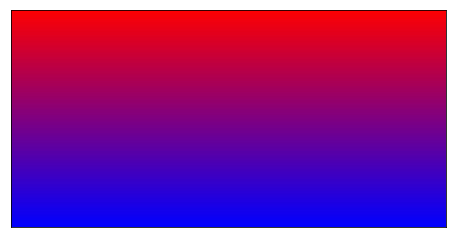

In [18]:
# command to be called outside the notebook:
command_imagemagick = "convert -size 2000x1000 gradient:red-blue sinusoid 4,-90 \
test_image_pano_equirectangular.jpg"

# run the command
subprocess.call(command_imagemagick, shell=True)

# load and display the imag created
img_equirect_pano_name = 'test_image_pano_equirectangular.jpg'
img_pano_equi = image.imread(img_equirect_pano_name)
plt.figure(figsize=(8,4))
plt.imshow(img_pano_equi)
plt.xticks([])
plt.yticks([]);

# Create pto file and call nano interpreter to create a little planet

The goal here is to use the **nano** the **hugin** scripting language.

It needs an image and a configuration file that describes the transformation we want to apply to the image.

In [10]:
def create_pto_config_file(path_and_name_equirectangular, output_file_name = "template33",
                           output_width = 3000, output_height = 1500,
                           r_angle = 0, p_angle = 90, y_angle = 0,
                           output_distance = 300):
    """This function create a pto file for hugin that can be used with nona.

    It uses a template in which we can change several parameters.
    What doesn't change is that we start from an equirectangular panorama that we remap to
    a spherical stereographic or something like that. Point is we are in the middle of a sphere
    and we want to apply some distorsion to make it appear like a litte planet.

    input:
        pano_equirectangular_name (char) : name of the panorama image you want to create little planet from.
        output_fileName (char) : "template33" | name of the pto filem can be changed
        image_width   (float) : 3000  | size for the input image (not sure it is necessary)
        image_height  (float) : 1500  |
        output_width  (float) : 3000  | size for the output little planet image
        output_height (float) : 1500  |
        r_angle (float) : 0           | angle values to make the initial spherical panorama to rotate before projection on plan
        p_angle (float) : 90          |
        y_angle (float) : 0           |
        output_distance (float) : 300 | tell how small(360)/big(0) will appear the little planet

    About r_angle, p_angle and y_angle, they are key parameters to control the rotationo of the little planet:
        - r_angle =   0, p_angle =  90, y_angle =   0 (default)
        - r_angle =   0, p_angle = -90, y_angle =   0 for an inverse little planet.
        - r_angle = -90, p_angle =   X, y_angle = -90 for a rotation clocklwise of X degrees.
        - r_angle =  90, p_angle =   X, y_angle = -90 for a rotation clockwise of an inverse little planet.
    """

    # get the size parameters from the pano equirectangular
    im_pano_equirectangular = image.imread(path_and_name_equirectangular)
    img_size = np.shape(im_pano_equirectangular)
    image_width  = img_size[1]
    image_height = img_size[0]

    # create pto
    #print(p_angle_val, out_dist_val)
    if os.path.isfile('template33.pto'):
        print('yes the pto file exists.')
        os.remove('template33.pto')
        print('not anymore, we will replace it by a new one.')
    else:
        print('The pto file does not exist, we will create it.')

    #hugin_ptoversion 2
    f = open(output_file_name+'.pto', 'w')
    f.write('# hugin project file\n')
    f.write('p f4 w'+str(output_width)+' h'+str(output_height)+' v'+str(output_distance)+' E0 R0 n"TIFF_m c:LZW r:CROP"\n')
    f.write('m g1 i0 f0 m2 p0.00784314\n')

    # image lines
    #-hugin  cropFactor=1
    f.write('i w'+str(image_width)+' h'+str(image_height)+' f4 v360 Ra0 Rb0 Rc0 Rd0 Re0 Eev0 Er1 Eb1 r'+str(r_angle)+' p'+str(p_angle)+' y'+str(y_angle)+' TrX0 TrY0 TrZ0 Tpy0 Tpp0 j0 a0 b0 c0 d0 e0 g0 t0 Va1 Vb0 Vc0 Vd0 Vx0 Vy0  Vm5 n"'+path_and_name_equirectangular+'"\n')

    # specify variables that should be optimized
    f.write('v Ra0\n')
    f.write('v Rb0\n')
    f.write('v Rc0\n')
    f.write('v Rd0\n')
    f.write('v Re0\n')
    f.write('v Vb0\n')
    f.write('v Vc0\n')
    f.write('v Vd0\n')
    f.write('v\n')

    f.close()

def create_little_planet(path_and_name_equirectangular, config_file_pto = "template33.pto",
                         little_planet_name = "little_planet_thumb"):
    """The function will call the funcion create_pto_config_file to be able to
    create the final little planet.


    IN:
        - path_and_name_equirectangular (str): path and name of the equirectangular image
        - config_file_pto (str): name of the pto config file to use
        - little_planet_name (str):
    """

    # apply command
    command_line_for_Hugin = "/usr/bin/nona -o ./imLittlePlanet33 -m TIFF %s %s " \
    % (config_file_pto,path_and_name_equirectangular)
    subprocess.call(command_line_for_Hugin, shell=True)

    # convert the TIFF file to jpg
    im_little_planet_tiff = image.imread('./imLittlePlanet33.tif')
    image.imsave('./'+little_planet_name+'.jpg', im_little_planet_tiff)


We created some function above, let's use them now.

In [22]:
# create a pto file
create_pto_config_file(img_equirect_pano_name, output_file_name = "template33",
                           output_width = 2000,
                           output_height = 1000,
                           r_angle = -90, 
                           p_angle = -90, 
                           y_angle = -90,
                           output_distance = 330)

# create the litlle planet and display it
create_little_planet(img_equirect_pano_name, config_file_pto = "template33.pto",
                         little_planet_name = "little_planet_thumb")

yes the pto file exists.
not anymore, we will replace it by a new one.


# Export the image in different format

Here we will use **imagemagick** to cut the newly created little planet image of ratio 2:1 into different ones:
+ ratio 1:1 or square format
+ ration 2:3 for easy print

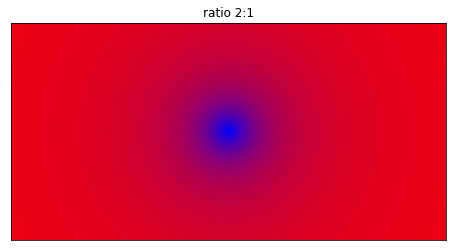

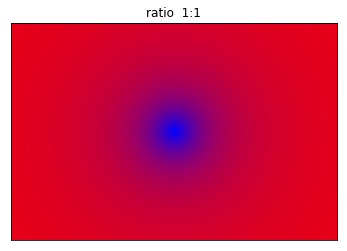

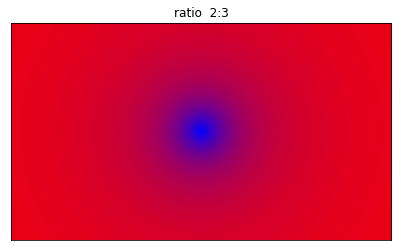

In [23]:
command_square_format = "convert little_planet_thumb.jpg -shave 250x0 little_planet_thumb_square.jpg"
subprocess.call(command_square_format, shell=True)

commnand_twobythree_format = "convert little_planet_thumb.jpg -shave 125x0 little_planet_thumb_twobythree.jpg"
subprocess.call(commnand_twobythree_format, shell=True)

# display the result
plt.figure(figsize=(8,4))
plt.title('ratio 2:1')
plt.imshow(image.imread('little_planet_thumb.jpg'))
plt.xticks([])
plt.yticks([]);

# display the result
plt.figure(figsize=(8,4))
plt.title('ratio  1:1')
plt.imshow(image.imread('little_planet_thumb_square.jpg'))
plt.xticks([])
plt.yticks([]);

# display the result
plt.figure(figsize=(8,4))
plt.title('ratio  2:3')
plt.imshow(image.imread('little_planet_thumb_twobythree.jpg'))
plt.xticks([])
plt.yticks([]);


In [15]:
!rm little_planet_thumb.jpg test_image_pano_equirectangular.jpg imLittlePlanet33.tif template33.pto

rm: cannot remove 'little_planet_thumb.jpg': No such file or directory
rm: cannot remove 'test_image_pano_equirectangular.jpg': No such file or directory
rm: cannot remove 'imLittlePlanet33.tif': No such file or directory


In [16]:
!ls

'Mini atelier to create little planet.ipynb'
